In [6]:
from keras import backend as K
import sys
import h5py
from utils import save_data, load_dataset, save_dataset, sort_result, predict_label, extract_melgrams


import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import librosa.display
import librosa


import scipy.io.wavfile
import pydub


/Users/Yassi/anaconda3/envs/genre_detect/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/Users/Yassi/anaconda3/envs/genre_detect/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


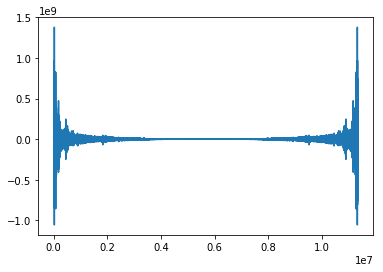

In [10]:
from numpy import fft as fft

example_folder = "music/"
#read mp3 file
mp3 = pydub.AudioSegment.from_mp3(example_folder+"example.mp3")
#export towav
mp3.export(example_folder+"example.wav",format = "wav")
#read wav file
rate,audData = scipy.io.wavfile.read(example_folder+"example.wav")



In [163]:
size = audData.shape[0]/2

signals = fft.fft(audData[:,0])
# plt.plot(signals[1:size/2])
# print(audData.shape)
# print(rate)

In [ ]:
src_au, sr = librosa.load('music/test/genres/rock/rock.00084.au', sr=12000)

# src_mp3, sr = librosa.load('music/example.mp3', sr=12000)


from pydub import AudioSegment
AudioSegment.from_file('music/test/genres/rock/rock.00084.au').export('music/rock.00084.mp3', format="mp3")

src_mp3, sr = librosa.load('music/rock.00084.mp3', sr=12000)

In [10]:
# test_songs_list = 'list_example.txt'
test_songs_list = 'one_song_test.txt'
MULTIFRAMES = 0
X, num_frames_test= extract_melgrams(test_songs_list, MULTIFRAMES, process_all_song=False, num_songs_genre='')





music/example3.mp3


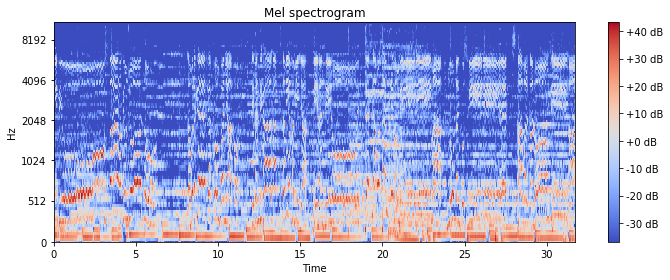

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[0,0,:,:],y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')
# plt.set_cmap('jet')

plt.title('Mel spectrogram')
plt.tight_layout()



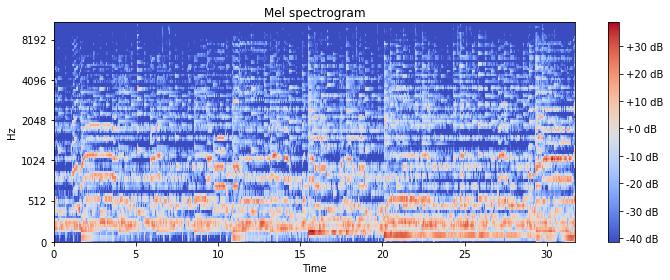

In [5]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(X[0,0,:,:],y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')
# plt.set_cmap('jet')

plt.title('Mel spectrogram')
plt.tight_layout()

In [99]:

SLICE = 0
LABELS =1
def cut_and_make_list(listPath,length,name,label,OutputPath , OutputFormat):
#     SR=12000
    songPaths = open(listPath, 'r').read().splitlines()
    labels = list()
    prevChunks=0

    for songId, songPath in enumerate(songPaths):
        myaudio = pydub.AudioSegment.from_file(songPath, "mp3")
        chunk_length_ms = length  # pydub calculates in millisec
        songChunks = int(len(myaudio)/chunk_length_ms) # Make chunks 

        print(songPath , ', number of chunks: ' , songChunks)


        for i in range(prevChunks,prevChunks+songChunks):
            if SLICE:
                chunk_name = OutputPath + name + "." + str(i).zfill(5) + "." + OutputFormat
                print("exporting", chunk_name)
                chunk = myaudio[i*chunk_length_ms:i*chunk_length_ms+chunk_length_ms]
                chunk.export(chunk_name,format=OutputFormat)
                labels.append(label)
            if LABELS:
                labels.append(label)
            prevChunks = songChunks + prevChunks

    if LABELS:
        with open(OutputPath + 'train_FMA_labels.txt', 'a') as f:
            for item in labels:
                f.write("%s\n" % item)

    
        
        

In [101]:
cut_and_make_list("list_train_blues.txt",     30000,"blues",      0, "music/train_FMA/" , "au")
cut_and_make_list("list_train_classical.txt", 30000,"classical",  1, "music/train_FMA/" , "au")
cut_and_make_list("list_train_country.txt",   30000,"country",    2, "music/train_FMA/" , "au")
cut_and_make_list("list_train_hiphop.txt",    30000,"hiphop",     3, "music/train_FMA/" , "au")
cut_and_make_list("list_train_jazz.txt",      30000,"jazz",       4, "music/train_FMA/" , "au")
cut_and_make_list("list_train_pop.txt",       30000,"pop",        5, "music/train_FMA/" , "au")
cut_and_make_list("list_train_rock.txt",      30000,"rock",       6, "music/train_FMA/" , "au")

('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Dee_Yan-Key_-_02_-_Unknown_Lovers_Blues.mp3', ', number of chunks: ', 6)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Dinura_Pradeep_Balasooriya_-_26_-_Cmaj13.mp3', ', number of chunks: ', 0)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/HR_Jothipala_-_05_-_Ma_Gee_Katadai.mp3', ', number of chunks: ', 7)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Head_Vs_Wall_-_05_-_A_Fool_Of_The_First_Water.mp3', ', number of chunks: ', 7)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Jessy_Damon_-_Jenny_Jahlee-04Mirror_Of_Me-Sept_2018-LIVE.mp3', ', number of chunks: ', 9)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Lobo_Loco_-_03_-_Driving_to_the_Delta_ID_923.mp3', ', number of chunks: ', 2)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/Loren_Connors_and_Bill_Orcutt_-_01_-_Untitled_1.mp3', ', number of chunks: ', 12)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/blues/

('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Derek_Clegg_-_10_-_Strangers.mp3', ', number of chunks: ', 7)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Eggs_Over_Easy_-_02_-_Party_Party.mp3', ', number of chunks: ', 7)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Holly_Go_-_04_-_Junk_Pile.mp3', ', number of chunks: ', 6)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Holly_Go_-_05_-_Boats_Up_The_River.mp3', ', number of chunks: ', 5)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Josh_Armistead_-_03_-_Insulated_By_The_Wheels.mp3', ', number of chunks: ', 9)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Lobo_Loco_-_03_-_Driving_to_the_Delta_ID_923.mp3', ', number of chunks: ', 2)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Lobo_Loco_-_03_-_Steeplechase_ID_705.mp3', ', number of chunks: ', 3)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/country/Lobo_Loco_-_04_-_Blues_Angeline_ID_702.mp3', 

('/Users/Yassi/Documents/CS230/project/dataset/FMA/hiphop/Yung_Kartz_-_24_-_Hunnits_On_My_Lap_Remastered.mp3', ', number of chunks: ', 6)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/hiphop/igil_tmlton_-_01_-_t_1.mp3', ', number of chunks: ', 5)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/hiphop/igil_tmlton_-_03_-_t_3.mp3', ', number of chunks: ', 3)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/jazz/Dee_Yan-Key_-_04_-_business_trip.mp3', ', number of chunks: ', 13)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/jazz/Dee_Yan-Key_-_06_-_Lazy.mp3', ', number of chunks: ', 9)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/jazz/Dee_Yan-Key_-_10_-_Slow_Movement.mp3', ', number of chunks: ', 21)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/jazz/Dingonek_Street_Band_-_01_-_Siddhartha.mp3', ', number of chunks: ', 10)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/jazz/Dingonek_Street_Band_-_04_-_Dance_of_the_Dingonek.mp3', ', number of chunks: ', 13)
('/Use

('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Dark_Meat_-_01_-_When_The_Killers_Came.mp3', ', number of chunks: ', 10)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Dee_Yan-Key_-_05_-_To_Italy.mp3', ', number of chunks: ', 1)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Duncan_Reid_and_the_Big_Heads_-_03_-_Soda_Pressing.mp3', ', number of chunks: ', 4)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Duncan_Reid_and_the_Big_Heads_-_04_-_Cest_La_Vie.mp3', ', number of chunks: ', 6)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Duncan_Reid_and_the_Big_Heads_-_08_-_Just_Because_Youre_Paranoid.mp3', ', number of chunks: ', 8)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Duncan_Reid_and_the_Big_Heads_-_17_-_First_Time.mp3', ', number of chunks: ', 7)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/Juniore_-_03_-_Magnifique.mp3', ', number of chunks: ', 6)
('/Users/Yassi/Documents/CS230/project/dataset/FMA/rock/KieLoBot_-_11_

In [112]:
from sklearn.utils import shuffle


labels = open("music/train_FMA/train_FMA_labels.txt", 'r').read().splitlines()
songs  =  open("music/train_FMA/train_FMA_list.txt", 'r').read().splitlines()


songs, labels = shuffle(songs,labels)
with open("music/train_FMA/train_FMA_list_shuffled.txt", 'w') as f:
    for song in songs:
        f.write("%s\n" % song)
        
with open("music/train_FMA/train_FMA_labels_shuffled.txt", 'w') as f:
    for song in songs:        
        f.write("%s\n" % labels)


In [114]:
with h5py.File('music_dataset/music_dataset_FMA.h5', 'r') as hf:
    print(hf.keys())

[u'data', u'labels', u'num_frames']


In [51]:
data = np.load('/Users/Yassi/Downloads/msdi-data/train_data/X_test_visual_MSD-I.npy')
data.shape

(4649, 2048)

In [162]:
# import urllib2
# response = urllib2.urlopen('https://freemusicarchive.org/music/charts/?genre=3&chart=interest')
# html = response.read()
from bs4 import BeautifulSoup
import urllib2
import requests
r  = requests.get("https://freemusicarchive.org/music/charts/?genre=3&chart=interest")
data = r.text
soup = BeautifulSoup(data)
url_list =[]
# for link in soup.find_all('a'):

#     response = urllib2.urlopen(link.get('href'))
#     html = response.read()

#     r = urllib2.urlopen(link.get('href'))
#     html = r.read()
#     print(link.get('href'))
# CHUNK_SIZE = 1 << 20
#     with open('compressed_file.tar.gz', 'wb') as f:
# line belows downloads all file at once to memory, and dumps it to file afterwards
# f.write(r.read())
# below is preferable lazy solution - download and write data in chunks
#     while True:
#         chunk = r.read(CHUNK_SIZE)
#         if not chunk:
#             break
#         f.write(r.read())
#     print(link.get('href'))